In [40]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


#MA model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import pmdarima as pmd
from statsmodels.tsa.seasonal import seasonal_decompose


Get data, cleanning it, indexing with dates aggregating sentiment per day and saving it to another dataframe.

In [55]:
data = pd.read_csv('ProjectPH_2013_2021.csv', usecols = [i for i in range(1,7)], index_col=0, parse_dates= True)
data['created'] = pd.to_datetime(data.index)


## ['[effacé]', '[supprimé]', 'Title', 'title', 'Title.'] :(
to_delete = np.array(data.selftext.value_counts().index[0:5])
posts_to_delete_filter = data.selftext.isin(to_delete)
print(f'#deleted: {np.sum(posts_to_delete_filter)}, #rows:{data.shape[0]}, %deleted: {np.sum(posts_to_delete_filter)/data.shape[0]}')
data = data[~posts_to_delete_filter]

# date_time_format = '%Y-%m-%d %H:%M:%S'

## create df per day
dates = np.sort(np.unique(data.created.dt.date))
mean_per_day = data.groupby(data.index.date).mean()

data_per_day = pd.DataFrame({"polarity": mean_per_day.sentiment_polarity, "subjectivity": mean_per_day.sentiment_subjectivity})
data_per_day.index = pd.DatetimeIndex(dates)
data_per_day = data_per_day.asfreq("D", fill_value=0)

data_per_week = data_per_day.groupby(pd.Grouper(freq="W-MON")).mean()
data_per_month = data_per_day.groupby(pd.Grouper(freq="MS")).mean()
###SPLIT DATA INTO TRAINING AND TEST DATA HERE!!!
month_training = data_per_month.head(int(round(0.8 * len(data_per_month))))
month_testing = data_per_month.tail(int(round(0.2 * len(data_per_month))))
#print("day: " , data_per_day.head())
#print("week:", data_per_week.head())
#print("month:", data_per_month.head())
print(month_training.columns)
month_training.sort_index(inplace=True)
month_training['date'] = pd.to_datetime(month_training.index)
month_testing['date'] = pd.to_datetime(month_testing.index)
pd.set_option("display.max_rows", None, "display.max_columns", None)
month_training



#deleted: 25546, #rows:70143, %deleted: 0.36419885091883725
Index(['polarity', 'subjectivity'], dtype='object')


/Users/Charlie/opt/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,polarity,subjectivity,date
2014-01-01,0.103327,0.324364,2014-01-01
2014-02-01,0.076303,0.241447,2014-02-01
2014-03-01,0.080916,0.314551,2014-03-01
2014-04-01,0.066695,0.278307,2014-04-01
2014-05-01,0.108591,0.300239,2014-05-01
2014-06-01,0.139042,0.322075,2014-06-01
2014-07-01,0.116251,0.349535,2014-07-01
2014-08-01,0.096802,0.320716,2014-08-01
2014-09-01,0.078980,0.319140,2014-09-01
2014-10-01,0.099390,0.301281,2014-10-01


Computing mean polarity per day per month, that could be used as prediction or trend for 2022.

In [56]:
month_day_vector = pd.to_datetime([f"2020-{str(month)}-{str(day)}" for day, month in zip(data.index.day, data.index.month)])
month_day_uniques = month_day_vector.unique().sort_values(ascending=1)

polarity_mean_per_day = []
subjectivity_mean_per_day = []
for month_day in month_day_uniques:
    filter_same_month_and_day = np.logical_and(data.index.day == month_day.day, data.index.month ==  month_day.month)
    polarity_mean_per_day.append(np.sum(data[filter_same_month_and_day].sentiment_polarity)/np.sum(filter_same_month_and_day))
    subjectivity_mean_per_day.append(np.sum(data[filter_same_month_and_day].sentiment_subjectivity)/np.sum(filter_same_month_and_day))

# sentiment_per_month = data.sentiment_polarity.groupby(data.index.month).mean()

Plotsss

In [57]:
def plot(x, y, title, show = True, legend = ''):
    plt.plot(x, y)
    plt.title(title)
    if show: plt.show()

def plot_df(df, title_to_add_after_col_name, y_col_names = [], show_every = False, x_col = "index"):
    plt.figure()
    y_col_names = df.columns if y_col_names == [] else y_col_names
    for col_name in y_col_names:
        x = df.index if x_col == "index" else df[x_col]
        plot(x, df[col_name], col_name + " " + title_to_add_after_col_name, show_every)
    if show_every == False:
        plt.title(", ".join(y_col_names) + " " + title_to_add_after_col_name)
    plt.legend(y_col_names)
    if not show_every: plt.show()


In [58]:
", ".join(month_training.columns)

'polarity, subjectivity, date'

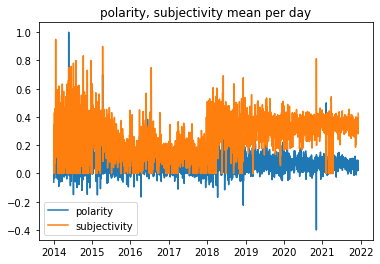

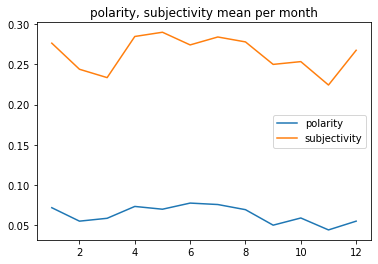

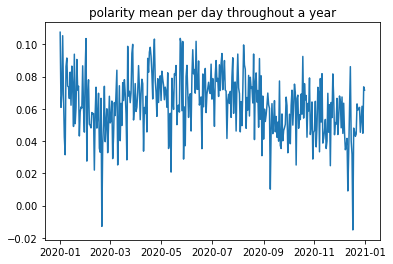

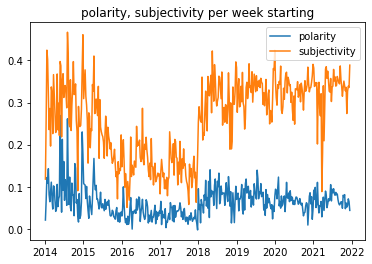

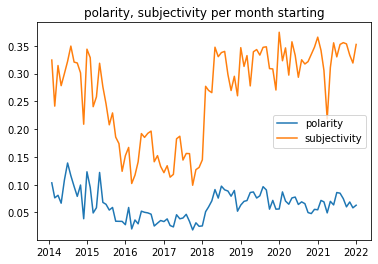

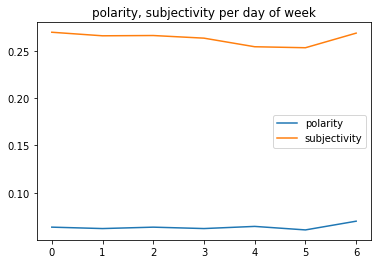

In [59]:
plot_df(data_per_day.groupby(pd.Grouper(freq="D")).mean(), "mean per day" )

plot_df(data_per_day.groupby(data_per_day.index.month).mean(), "mean per month")

plot(month_day_uniques, polarity_mean_per_day, "polarity mean per day throughout a year")
# plot(month_day_uniques, subjectivity_mean_per_day, "subjectivity pred mean per day")


plot_df(data_per_day.groupby(pd.Grouper(freq="W-MON")).mean(), "per week starting")
plot_df(data_per_day.groupby(pd.Grouper(freq="M")).mean(), "per month starting")
plot_df(data_per_day.groupby(data_per_day.index.weekday).mean(), 'per day of week')


Most usefull plots

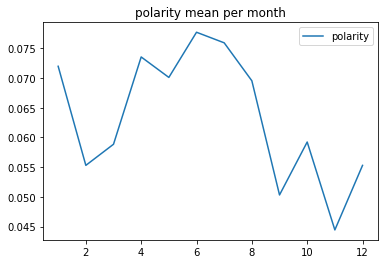

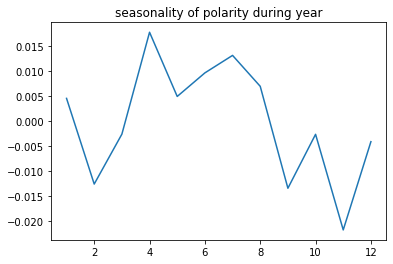

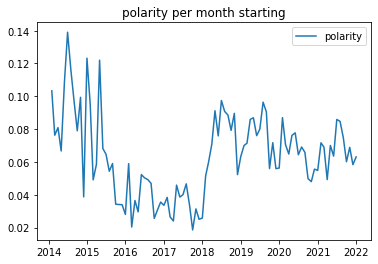

In [60]:
t = seasonal_decompose(month_training.polarity.asfreq('MS'), model='additive')
plot_df(data_per_day.groupby(data_per_day.index.month).mean(), "mean per month", y_col_names=["polarity"])

t.seasonal.groupby(t.seasonal.index.month).mean().plot(title="seasonality of polarity during year")
plt.plot()

plot_df(data_per_day.groupby(pd.Grouper(freq="M")).mean(), "per month starting", y_col_names= ['polarity'])

Let's define the steps we'll use:

        First run test and deduce which model to use
        Then fit models
        visualize again the data and predictions

In [63]:
def run_tests(time_serie):
    ad_res = adfuller(time_serie)
    print(ad_res[:4])
    while ad_res[1] > 0.1:
        time_serie = time_serie.diff()[1:]
        ad_res = adfuller(time_serie)
        print(ad_res[:4])
    
    plot_acf(time_serie, lags=37)
    plt.show()
    plot_pacf(time_serie, lags=37, method = "ywm")
    plt.show()

    seasonal_decompose(time_serie, model='additive').plot()
    plt.show()

    res = pmd.auto_arima(time_serie, start_p=1, start_q=1, test="adf", trace=True)
    print(res.summary())

def fit_models(model_names, time_serie):
    models = {}
    for model_name in model_names:
        model_type, parameters = model_name.split()
        if model_type.lower() == "arima":
            models[model_name] = ARIMA(time_serie, order =  tuple(int(e) for e in parameters)).fit()
        if model_type.lower() == "sarimax":
            models[model_name] = SARIMAX(time_serie, order =  tuple(int(e) for e in parameters)).fit()
    return models


def model_visualization(models, time_serie, pred_after_end = 5, get_res = 0):
    start, end = 0, len(time_serie)
    start_pred, end_pred = len(time_serie), len(time_serie) + pred_after_end

    data = {time_serie.name: time_serie}
    pred_data = {}
    for model_name, model in models.items():
        data[model_name] = model.predict(start, end)
        pred_data[model_name] = model.predict(start_pred, end_pred)

    data = pd.DataFrame(data)
    pred_data = pd.DataFrame(pred_data)
    
    data.plot(figsize=(10, 6))
    plt.plot()
    pred_data.plot(figsize=(10, 6))
    plt.plot()
    if get_res:
        return data, pred_data


Working on data_per_day

(-5.420852647420387, 3.061837218305543e-06, 28, 2870)


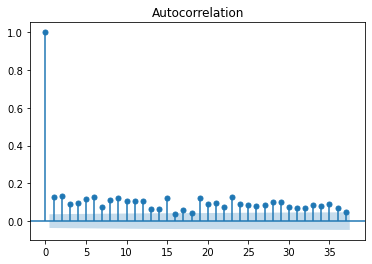

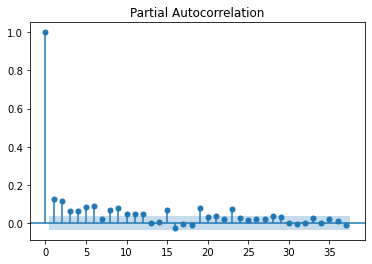

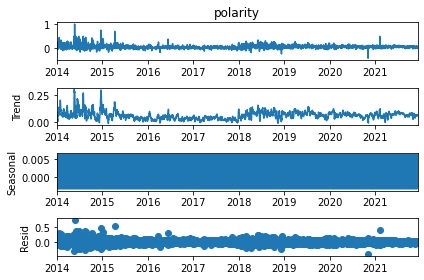

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-7273.351, Time=2.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-7065.884, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-7110.820, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-7101.961, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-5374.308, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-7223.259, Time=1.93 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-7235.554, Time=1.81 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-7135.435, Time=0.77 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-7148.199, Time=0.20 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-7266.055, Time=2.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-7274.209, Time=0.55 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-5884.640, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-6258.791, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-7275.413, Time=0.95 sec
 ARIMA(2,0,0)(0,0,0

In [64]:
run_tests(data_per_day.polarity)

In [65]:
fitted_models_day = fit_models(["arima 401", "arima 301", "arima 202"], data_per_day.polarity)

/Users/Charlie/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/Charlie/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/Charlie/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/Charlie/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


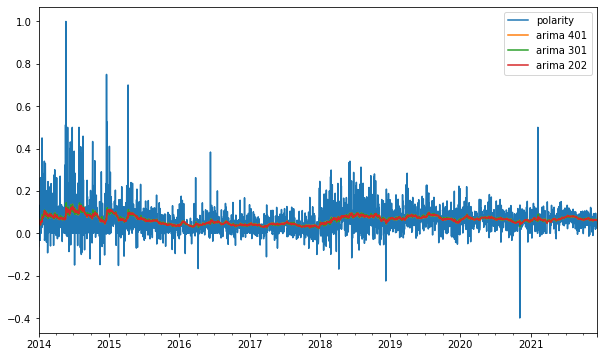

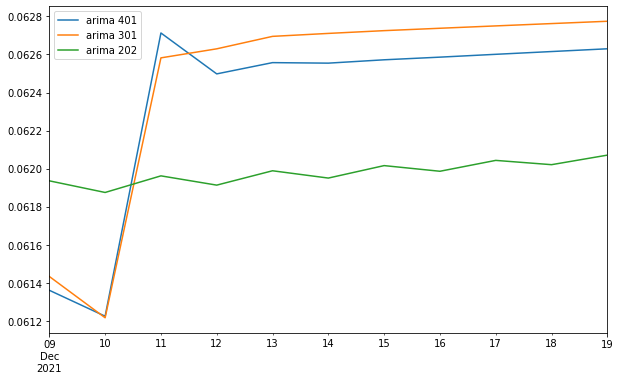

In [66]:
model_visualization(fitted_models_day, data_per_day.polarity, 10)

    Working on data_per_week

(-2.7054142733156348, 0.07310604026500439, 9, 405)


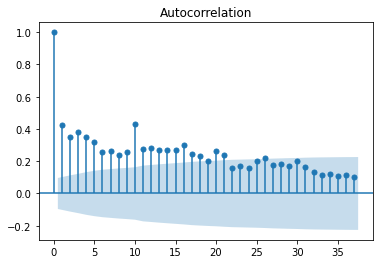

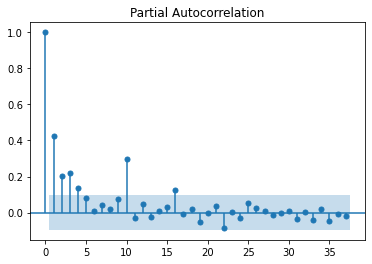

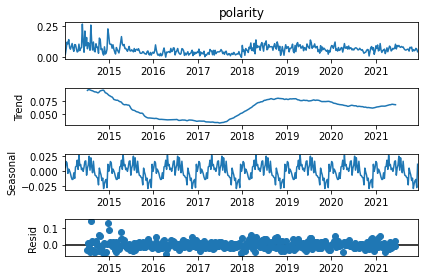

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1733.058, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1600.862, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1681.953, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1657.337, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-996.995, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1733.878, Time=0.40 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1697.508, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1730.941, Time=0.44 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1732.025, Time=0.37 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1734.167, Time=0.36 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1669.481, Time=0.19 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1724.412, Time=0.42 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1683.795, Time=0.23 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1730.147, Time=0.45 sec
 ARIMA(1,0,2)(0,0,0)

In [67]:
run_tests(data_per_week.polarity)

In [68]:
fitted_models_week = fit_models(["arima 101", "arima 102", "arima 201", "arima 100"], data_per_week.polarity)

/Users/Charlie/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/Charlie/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/Charlie/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


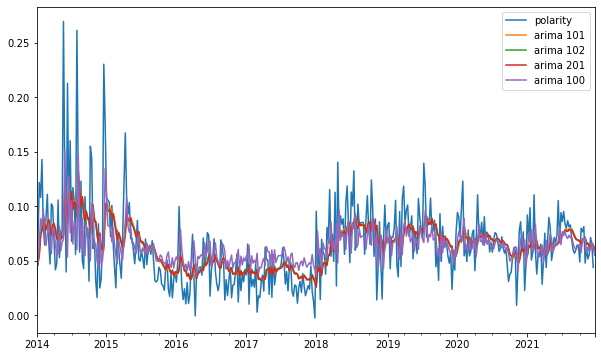

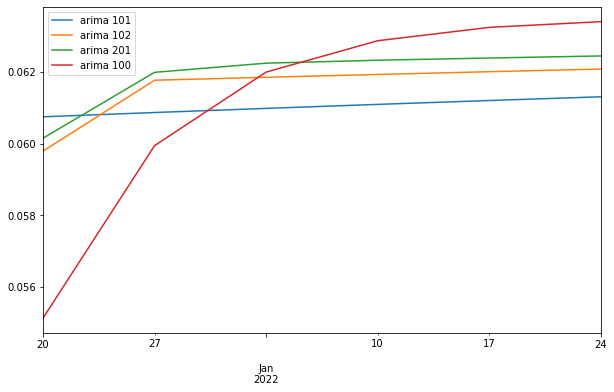

In [69]:
model_visualization(fitted_models_week, data_per_week.polarity)

    Working on data_per_month

(-2.0707202099284245, 0.25644993206371847, 4, 72)
(-5.545730866683735, 1.6625808214399914e-06, 4, 71)


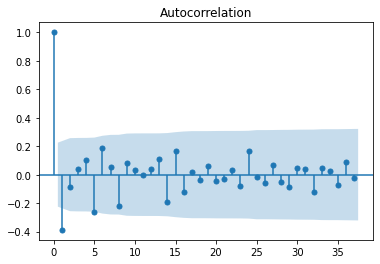

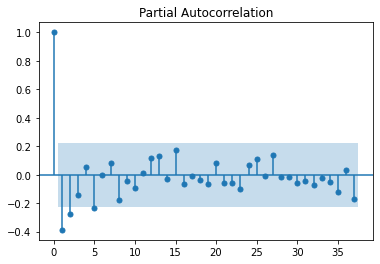

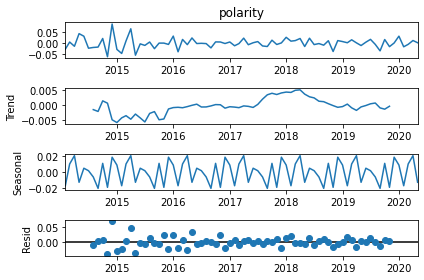

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-371.559, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-355.158, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-365.635, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-373.323, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-357.142, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-371.587, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-369.449, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-375.262, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-373.481, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-373.509, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-367.615, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-371.372, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.501 seconds
                               SARIMAX Results                                
Dep. Vari

In [74]:
run_tests(month_training.polarity)

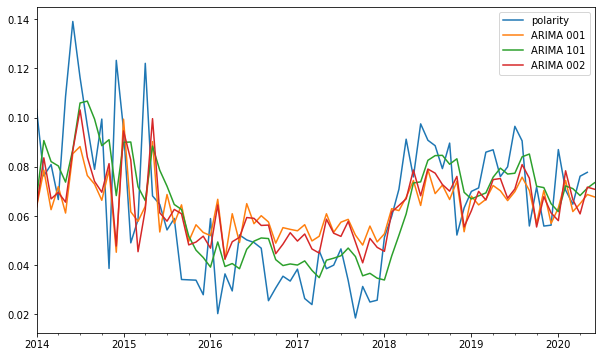

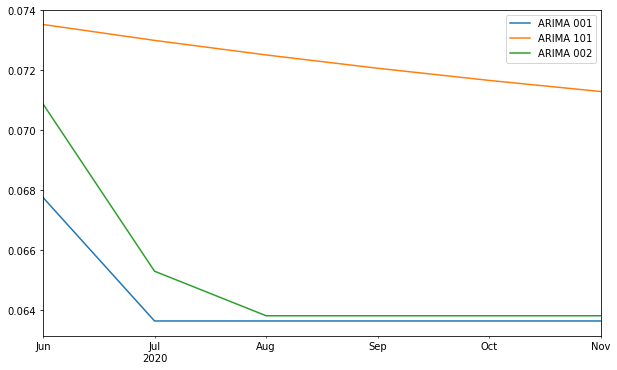

In [75]:
models_to_fit = ["ARIMA 001", "ARIMA 101", "ARIMA 002"]
fitted_models_month = fit_models(models_to_fit, month_training.polarity)
model_visualization(fitted_models_month, month_training.polarity)